In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename

Matplotlib is building the font cache; this may take a moment.


In [156]:
#Initial looking at own by hand dolphot 
col = pd.read_csv('/Users/debbytran/Data/HST/15877/NGC6946-2.out.columns',sep = '\.\s',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#', engine = 'python')
df = pd.read_csv('/Users/debbytran/Data/HST/15877/NGC6946-2.out',sep = '\s+',engine = 'python',names = col.column.values,usecols = ['x','y','cr275','cr_sig275','vega_mag275','vega_mag_sig275','SNR275','Sharpness275','Crowding275','cr336','cr_sig336','vega_mag336','vega_mag_sig336','SNR336','Sharpness336','Crowding336'])

Text(0.5, 1.0, 'F336W vs. F275 Magnitudes with Error Bars- No Cuts')

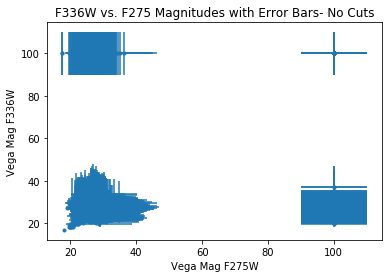

In [19]:
#Just plotting magnitudes without cuts
plt.errorbar(df.vega_mag275.values, df.vega_mag336.values,xerr=df.vega_mag_sig275.values, yerr=df.vega_mag_sig336.values, fmt='.')
plt.xlabel('Vega Mag F275W')
plt.ylabel('Vega Mag F336W')
plt.title('F336W vs. F275 Magnitudes with Error Bars- No Cuts')

In [20]:
#cutting out anything that is at max value and thus probably a hot pixel or some crud
sigcut = df[(df.vega_mag_sig275<9.99) & (df.vega_mag_sig336<9.99) & (df.vega_mag275<99) & (df.vega_mag336<99)]

Text(0.5, 1.0, 'F336W vs. F275 Magnitudes - Cut Max Errors and Magnitudes')

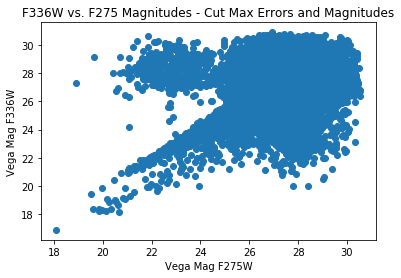

In [161]:
#plt.errorbar(sigcut.vega_mag275.values, sigcut.vega_mag336.values,xerr=sigcut.vega_mag_sig275.values, yerr=sigcut.vega_mag_sig336.values, fmt='.')
plt.scatter(sigcut.vega_mag275.values, sigcut.vega_mag336.values)
plt.xlabel('Vega Mag F275W')
plt.ylabel('Vega Mag F336W')
plt.title('F336W vs. F275 Magnitudes - Cut Max Errors and Magnitudes')

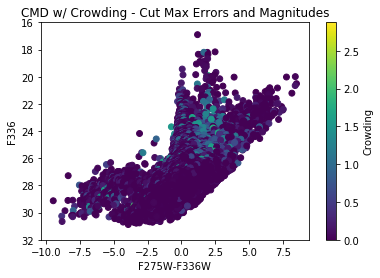

In [47]:
#CMD
cm = plt.cm.get_cmap('viridis')
plt.scatter(sigcut.vega_mag275.values-sigcut.vega_mag336.values, sigcut.vega_mag336.values, c=sigcut.Crowding336.values, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'SNR')
plt.ylim(32,16)
plt.xlabel('F275W-F336W')
plt.ylabel('F336')
plt.title('CMD w/ Crowding - Cut Max Errors and Magnitudes')
plt.show()

In [157]:
#making harder cuts 
hardcut = df[(df.vega_mag_sig275<9.99) & (df.vega_mag_sig336<9.99) 
             & (df.vega_mag275<99) & (df.vega_mag336<99) 
             & (df.Crowding275<.7) & (df.Crowding336<.7)
             & (df.SNR275>4) & (df.SNR336>4)]

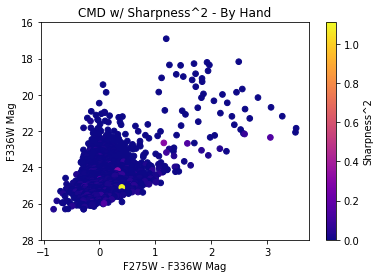

In [183]:
#CMD with sharpness^2 colorbar
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut.vega_mag275.values-hardcut.vega_mag336.values, hardcut.vega_mag336.values, c=hardcut.Sharpness336.values**2, s=32, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.ylim(28,16)
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - By Hand')
plt.show()

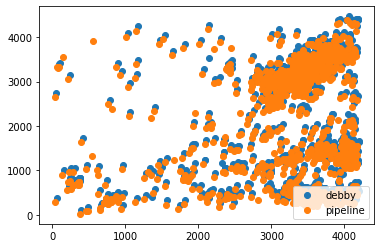

In [189]:
plt.scatter(hardcut.x.values,hardcut.y.values,label='debby')
plt.scatter(hardcut2.x.values,hardcut2.y.values,label='pipeline')
plt.legend(loc=4)

In [187]:
print(hardcut2.x.values[(hardcut2.x.values<600) & (hardcut2.x.values>500) & (hardcut2.y.values>1300) & (hardcut2.y.values<1400)])
print(hardcut2.y.values[(hardcut2.x.values<600) & (hardcut2.x.values>500) & (hardcut2.y.values>1300) & (hardcut2.y.values<1400)])
print(hardcut2[(hardcut2.x==565.92) & (hardcut2.y==3907.44)])
print(hardcut2[(hardcut2.x==539.62) & (hardcut2.y==1322.41)])

[539.62]
[1322.41]
           x        y  mag275  mag_sig275  SNR275  Sharpness275  Crowding275  \
9397  565.92  3907.44  26.019       0.262     4.1         0.034        0.161   

      mag336  mag_sig336  SNR336  Sharpness336  Crowding336  
9397  25.806       0.136     8.0        -0.121        0.089  
           x        y  mag275  mag_sig275  SNR275  Sharpness275  Crowding275  \
2813  539.62  1322.41  26.291       0.265     4.1         0.127        0.016   

      mag336  mag_sig336  SNR336  Sharpness336  Crowding336  
2813  23.047       0.031    34.8         0.029        0.084  


In [140]:
#trying to figure out how to make file for fits region but ds9 isn't happy with me 
circ = ['circle']*1802
arr = np.asarray([circ,hardcut.x.values,hardcut.y.values])
np.savetxt('pos.txt',np.transpose(arr),delimiter=',', fmt = '%s')

In [164]:
#converting x,y to RA and Dec
f = fits.open('/Users/debbytran/Data/HST/15877/ie3y01030_drc.fits')
w = WCS(f[1].header)
sky = w.pixel_to_world(hardcut.x.values,hardcut.y.values)

In [412]:
#isochrones from 1 Myr - 100 Myr
iso = pd.read_csv('/Users/debbytran/Data/HST/isochrone-log.txt',header=0, comment ='#',sep = '\s+',engine = 'python',usecols = ['Mass','logAge','logTe','F275W1mag','F336Wmag'])
iso1 = iso[iso.logAge<8.0]
d = 29.4 #distance modulus
iso336 = iso.F336Wmag.values+d
iso275 = iso.F275W1mag.values+d


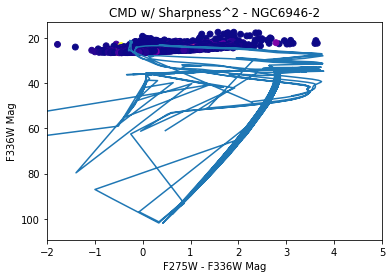

In [413]:
plt.plot(iso275-iso336, iso336)
plt.scatter(hardcut5.mag275.values-hardcut5.mag336.values, hardcut5.mag336.values, c=hardcut5.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
#add distance in to plot - account for distance modulus
#29.4 - brad paper SNE paper 8 mpc  
#plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlim(-2,5)
#plt.ylim(28,16)
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-2')
plt.show()

In [244]:
print(np.max(iso.F336Wmag.values))

16.247


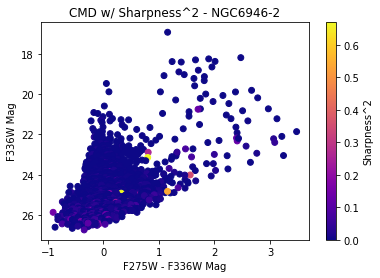

In [2]:
#Pipeline reduction of field 2 
col = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-2.phot.columns',sep = '\.\s', engine = 'python',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#')
df2 = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-2.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut2 = df2[(df2.mag_sig275<9.99) & (df2.mag_sig336<9.99) 
             & (df2.mag275<99) & (df2.mag336<99) 
             & (df2.Crowding275<.7) & (df2.Crowding336<.7)
             & (df2.SNR275>4) & (df2.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut2.mag275.values-hardcut2.mag336.values, hardcut2.mag336.values, c=hardcut2.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-2')
plt.show()

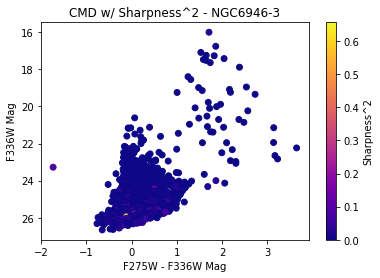

In [3]:
#Pipeline reduction of field 3
col = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3.phot.columns',sep = '\.\s', engine = 'python',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#')
df3 = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut3 = df3[(df3.mag_sig275<9.99) & (df3.mag_sig336<9.99) 
             & (df3.mag275<99) & (df3.mag336<99) 
             & (df3.Crowding275<.7) & (df3.Crowding336<.7)
             & (df3.SNR275>4) & (df3.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut3.mag275.values-hardcut3.mag336.values, hardcut3.mag336.values, c=hardcut3.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-3')
plt.show()

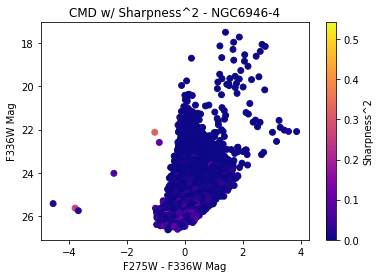

In [4]:
#Pipeline reduction of field 4
#col = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3.phot.columns',sep = '\.\s', engine = 'python',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#')
df4 = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-4.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut4 = df4[(df4.mag_sig275<9.99) & (df4.mag_sig336<9.99) 
             & (df4.mag275<99) & (df4.mag336<99) 
             & (df4.Crowding275<.7) & (df4.Crowding336<.7)
             & (df4.SNR275>4) & (df4.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut4.mag275.values-hardcut4.mag336.values, hardcut4.mag336.values, c=hardcut4.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-4')
plt.show()

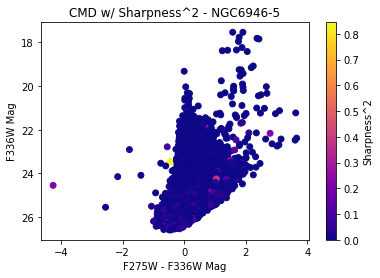

In [5]:
#Pipeline reduction of field 5
#col = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3.phot.columns',sep = '\.\s', engine = 'python',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#')
df5 = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-5.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut5 = df5[(df5.mag_sig275<9.99) & (df5.mag_sig336<9.99) 
             & (df5.mag275<99) & (df5.mag336<99) 
             & (df5.Crowding275<.7) & (df5.Crowding336<.7)
             & (df5.SNR275>4) & (df5.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut5.mag275.values-hardcut5.mag336.values, hardcut5.mag336.values, c=hardcut5.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-5')
plt.show()

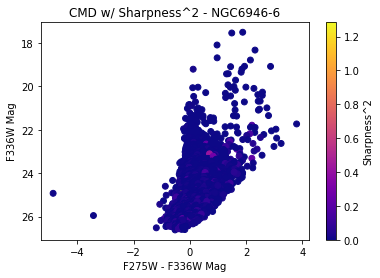

In [6]:
#Pipeline reduction of field 6
#col = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3.phot.columns',sep = '\.\s', engine = 'python',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#')
df6 = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-6.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut6 = df6[(df6.mag_sig275<9.99) & (df6.mag_sig336<9.99) 
             & (df6.mag275<99) & (df6.mag336<99) 
             & (df6.Crowding275<.7) & (df6.Crowding336<.7)
             & (df6.SNR275>4) & (df6.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut6.mag275.values-hardcut6.mag336.values, hardcut6.mag336.values, c=hardcut6.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-6')
plt.show()

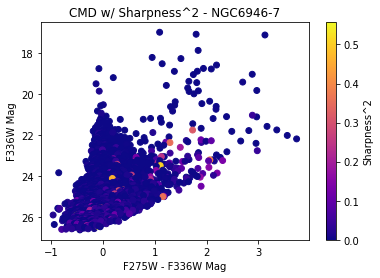

In [7]:
#Pipeline reduction of field 7
#col = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3.phot.columns',sep = '\.\s', engine = 'python',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#')
df7 = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-7.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut7 = df7[(df7.mag_sig275<9.99) & (df7.mag_sig336<9.99) 
             & (df7.mag275<99) & (df7.mag336<99) 
             & (df7.Crowding275<.7) & (df7.Crowding336<.7)
             & (df7.SNR275>4) & (df7.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut7.mag275.values-hardcut7.mag336.values, hardcut7.mag336.values, c=hardcut7.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-7')
plt.show()

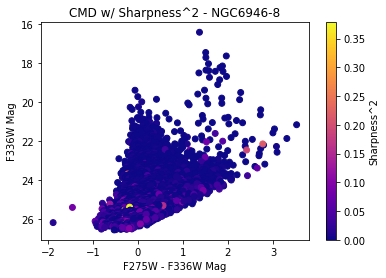

In [8]:
#Pipeline reduction of field 8
#col = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3.phot.columns',sep = '\.\s', engine = 'python',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#')
df8 = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-8.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut8 = df8[(df8.mag_sig275<9.99) & (df8.mag_sig336<9.99) 
             & (df8.mag275<99) & (df8.mag336<99) 
             & (df8.Crowding275<.7) & (df8.Crowding336<.7)
             & (df8.SNR275>4) & (df8.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut8.mag275.values-hardcut8.mag336.values, hardcut8.mag336.values, c=hardcut8.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-8')
plt.show()

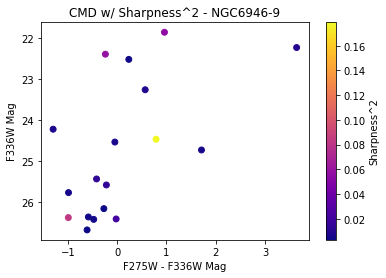

In [9]:
#Pipeline reduction of field 9
#col = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3.phot.columns',sep = '\.\s', engine = 'python',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#')
df9 = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-9.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut9 = df9[(df9.mag_sig275<9.99) & (df9.mag_sig336<9.99) 
             & (df9.mag275<99) & (df9.mag336<99) 
             & (df9.Crowding275<.7) & (df9.Crowding336<.7)
             & (df9.SNR275>4) & (df9.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut9.mag275.values-hardcut9.mag336.values, hardcut9.mag336.values, c=hardcut9.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-9')
plt.show()

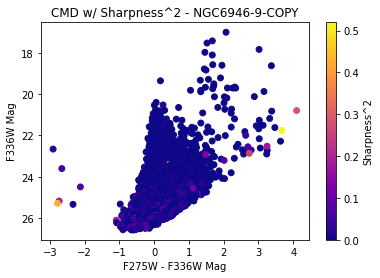

In [10]:
#Pipeline reduction of field 9 - COPY
#col = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3.phot.columns',sep = '\.\s', engine = 'python',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#')
df9c = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-9-COPY.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut9c = df9c[(df9c.mag_sig275<9.99) & (df9c.mag_sig336<9.99) 
             & (df9c.mag275<99) & (df9c.mag336<99) 
             & (df9c.Crowding275<.7) & (df9c.Crowding336<.7)
             & (df9c.SNR275>4) & (df9c.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut9c.mag275.values-hardcut9c.mag336.values, hardcut9c.mag336.values, c=hardcut9c.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-9-COPY')
plt.show()

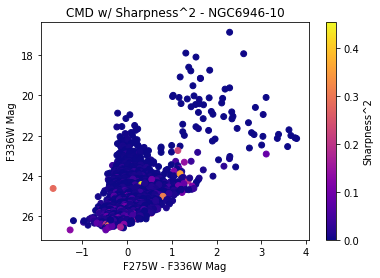

In [11]:
#Pipeline reduction of field 10
#col = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3.phot.columns',sep = '\.\s', engine = 'python',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#')
df10 = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-10.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut10 = df10[(df10.mag_sig275<9.99) & (df10.mag_sig336<9.99) 
             & (df10.mag275<99) & (df10.mag336<99) 
             & (df10.Crowding275<.7) & (df10.Crowding336<.7)
             & (df10.SNR275>4) & (df10.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut10.mag275.values-hardcut10.mag336.values, hardcut10.mag336.values, c=hardcut10.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-10')
plt.show()

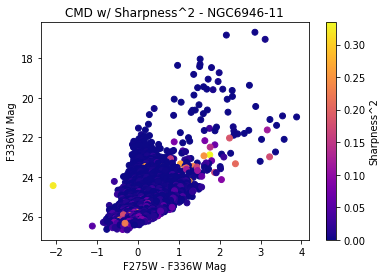

In [12]:
#Pipeline reduction of field 11
#col = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3.phot.columns',sep = '\.\s', engine = 'python',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#')
df11 = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-11.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut11 = df11[(df11.mag_sig275<9.99) & (df11.mag_sig336<9.99) 
             & (df11.mag275<99) & (df11.mag336<99) 
             & (df11.Crowding275<.7) & (df11.Crowding336<.7)
             & (df11.SNR275>4) & (df11.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut11.mag275.values-hardcut11.mag336.values, hardcut11.mag336.values, c=hardcut11.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-11')
plt.show()

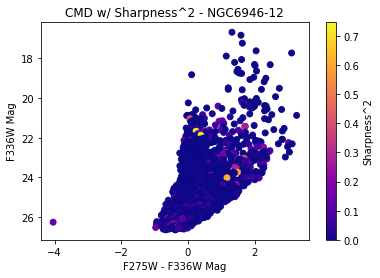

In [13]:
#Pipeline reduction of field 12
#col = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3.phot.columns',sep = '\.\s', engine = 'python',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#')
df12 = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-12.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut12 = df12[(df12.mag_sig275<9.99) & (df12.mag_sig336<9.99) 
             & (df12.mag275<99) & (df12.mag336<99) 
             & (df12.Crowding275<.7) & (df12.Crowding336<.7)
             & (df12.SNR275>4) & (df12.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut12.mag275.values-hardcut12.mag336.values, hardcut12.mag336.values, c=hardcut12.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-12')
plt.show()

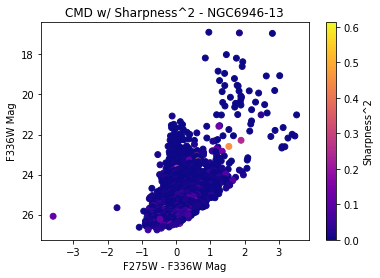

In [14]:
#Pipeline reduction of field 13
#col = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3.phot.columns',sep = '\.\s', engine = 'python',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#')
df13 = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-13.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut13 = df13[(df13.mag_sig275<9.99) & (df13.mag_sig336<9.99) 
             & (df13.mag275<99) & (df13.mag336<99) 
             & (df13.Crowding275<.7) & (df13.Crowding336<.7)
             & (df13.SNR275>4) & (df13.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut13.mag275.values-hardcut13.mag336.values, hardcut13.mag336.values, c=hardcut13.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-13')
plt.show()

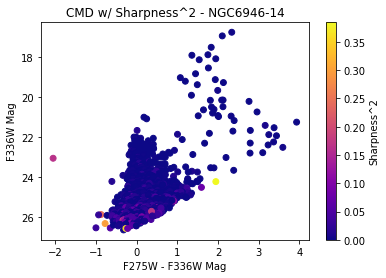

In [15]:
#Pipeline reduction of field 14
#col = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3.phot.columns',sep = '\.\s', engine = 'python',names = ['i','column'],dtype ={'i':np.int,'column':np.str},comment='#')
df14 = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-14.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut14 = df14[(df14.mag_sig275<9.99) & (df14.mag_sig336<9.99) 
             & (df14.mag275<99) & (df14.mag336<99) 
             & (df14.Crowding275<.7) & (df14.Crowding336<.7)
             & (df14.SNR275>4) & (df14.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut14.mag275.values-hardcut14.mag336.values, hardcut14.mag336.values, c=hardcut14.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-14')
plt.show()

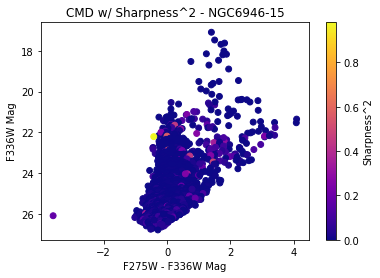

In [16]:
#Pipeline reduction of field 15
df15 = pd.read_csv('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-15.phot',sep = '\s+',engine='python',names = col.column.values,usecols = ['x','y','mag275','mag_sig275','SNR275','Sharpness275','Crowding275','mag336','mag_sig336','SNR336','Sharpness336','Crowding336'])
hardcut15 = df15[(df15.mag_sig275<9.99) & (df15.mag_sig336<9.99) 
             & (df15.mag275<99) & (df15.mag336<99) 
             & (df15.Crowding275<.7) & (df15.Crowding336<.7)
             & (df15.SNR275>4) & (df15.SNR336>4)]
cm = plt.cm.get_cmap('plasma')
plt.scatter(hardcut15.mag275.values-hardcut15.mag336.values, hardcut15.mag336.values, c=hardcut15.Sharpness336.values**2, s=35, cmap=cm)#,norm=colors.LogNorm())
plt.colorbar(label = 'Sharpness^2')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD w/ Sharpness^2 - NGC6946-15')
plt.show()

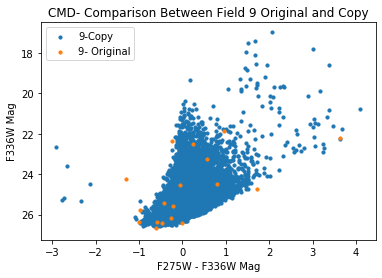

In [228]:
#Comparing field 9 original and copy
plt.scatter(hardcut9c.mag275.values-hardcut9c.mag336.values, hardcut9c.mag336.values, s=10, label = '9-Copy')
plt.scatter(hardcut9.mag275.values-hardcut9.mag336.values, hardcut9.mag336.values, s=10, label = '9- Original')
plt.gca().invert_yaxis()
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('CMD- Comparison Between Field 9 Original and Copy')
plt.legend()
plt.show()

In [17]:
#converting all x and y into RA and dec plot
#converting x,y to RA and Dec
f = fits.open('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-2_F275W_drz.chip1.fits')
w = WCS(f[0].header)
ra2,dec2 = w.pixel_to_world_values(hardcut2.x.values,hardcut2.y.values)
f = fits.open('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-3_F275W_drz.chip1.fits')
w = WCS(f[0].header)
ra3,dec3 = w.pixel_to_world_values(hardcut3.x.values,hardcut3.y.values)
f = fits.open('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-4_F275W_drz.chip1.fits')
w = WCS(f[0].header)
ra4,dec4 = w.pixel_to_world_values(hardcut4.x.values,hardcut4.y.values)
f = fits.open('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-5_F275W_drz.chip1.fits')
w = WCS(f[0].header)
ra5,dec5 = w.pixel_to_world_values(hardcut5.x.values,hardcut5.y.values)
f = fits.open('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-6_F275W_drz.chip1.fits')
w = WCS(f[0].header)
ra6,dec6 = w.pixel_to_world_values(hardcut6.x.values,hardcut6.y.values)
f = fits.open('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-7_F275W_drz.chip1.fits')
w = WCS(f[0].header)
ra7,dec7 = w.pixel_to_world_values(hardcut7.x.values,hardcut7.y.values)
f = fits.open('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-8_F275W_drz.chip1.fits')
w = WCS(f[0].header)
ra8,dec8 = w.pixel_to_world_values(hardcut8.x.values,hardcut8.y.values)
f = fits.open('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-9_F275W_drz.chip1.fits')
w = WCS(f[0].header)
ra9,dec9 = w.pixel_to_world_values(hardcut9c.x.values,hardcut9c.y.values)
f = fits.open('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-10_F275W_drz.chip1.fits')
w = WCS(f[0].header)
ra10,dec10 = w.pixel_to_world_values(hardcut10.x.values,hardcut10.y.values)
f = fits.open('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-11_F275W_drz.chip1.fits')
w = WCS(f[0].header)
ra11,dec11 = w.pixel_to_world_values(hardcut11.x.values,hardcut11.y.values)
f = fits.open('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-12_F275W_drz.chip1.fits')
w = WCS(f[0].header)
ra12,dec12 = w.pixel_to_world_values(hardcut12.x.values,hardcut12.y.values)
f = fits.open('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-13_F275W_drz.chip1.fits')
w = WCS(f[0].header)
ra13,dec13 = w.pixel_to_world_values(hardcut13.x.values,hardcut13.y.values)
f = fits.open('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-14_F275W_drz.chip1.fits')
w = WCS(f[0].header)
ra14,dec14 = w.pixel_to_world_values(hardcut14.x.values,hardcut14.y.values)
f = fits.open('/Users/debbytran/Data/HST/15877/Pipeline/15877_NGC6946-15_F275W_drz.chip1.fits')
w = WCS(f[0].header)
ra15,dec15 = w.pixel_to_world_values(hardcut15.x.values,hardcut15.y.values)

In [397]:
#concatenating hardcut data from all fields - has duplicates
bigx = np.concatenate((ra2,ra3,ra4,ra5,ra6,ra7,ra8,ra9,ra10,ra11,ra12,ra13,ra14,ra15))
bigy = np.concatenate((dec2,dec3,dec4,dec5,dec6,dec7,dec8,dec9,dec10,dec11,dec12,dec13,dec14,dec15))
mag275 = np.concatenate((hardcut2.mag275.values,hardcut3.mag275.values,hardcut4.mag275.values,hardcut5.mag275.values,
                         hardcut6.mag275.values,hardcut7.mag275.values,hardcut8.mag275.values,hardcut9c.mag275.values,
                         hardcut10.mag275.values,hardcut11.mag275.values,hardcut12.mag275.values,
                         hardcut13.mag275.values,hardcut14.mag275.values,hardcut15.mag275.values))
mag336 = np.concatenate((hardcut2.mag336.values,hardcut3.mag336.values,hardcut4.mag336.values,hardcut5.mag336.values,
                         hardcut6.mag336.values,hardcut7.mag336.values,hardcut8.mag336.values,hardcut9c.mag336.values,
                         hardcut10.mag336.values,hardcut11.mag336.values,hardcut12.mag336.values,
                         hardcut13.mag336.values,hardcut14.mag336.values,hardcut15.mag336.values))
snr336 = np.concatenate((hardcut2.SNR336.values,hardcut3.SNR336.values,hardcut4.SNR336.values,hardcut5.SNR336.values,
                         hardcut6.SNR336.values,hardcut7.SNR336.values,hardcut8.SNR336.values,hardcut9c.SNR336.values,
                         hardcut10.SNR336.values,hardcut11.SNR336.values,hardcut12.SNR336.values,
                         hardcut13.SNR336.values,hardcut14.SNR336.values,hardcut15.SNR336.values))
snr275 = np.concatenate((hardcut2.SNR275.values,hardcut3.SNR275.values,hardcut4.SNR275.values,hardcut5.SNR275.values,
                         hardcut6.SNR275.values,hardcut7.SNR275.values,hardcut8.SNR275.values,hardcut9c.SNR275.values,
                         hardcut10.SNR275.values,hardcut11.SNR275.values,hardcut12.SNR275.values,
                         hardcut13.SNR275.values,hardcut14.SNR275.values,hardcut15.SNR275.values))
mag_sig275 = np.concatenate((hardcut2.mag_sig275.values,hardcut3.mag_sig275.values,hardcut4.mag_sig275.values,hardcut5.mag_sig275.values,
                         hardcut6.mag_sig275.values,hardcut7.mag_sig275.values,hardcut8.mag_sig275.values,hardcut9c.mag_sig275.values,
                         hardcut10.mag_sig275.values,hardcut11.mag_sig275.values,hardcut12.mag_sig275.values,
                         hardcut13.mag_sig275.values,hardcut14.mag_sig275.values,hardcut15.mag_sig275.values))
mag_sig336 = np.concatenate((hardcut2.mag_sig336.values,hardcut3.mag_sig336.values,hardcut4.mag_sig336.values,hardcut5.mag_sig336.values,
                         hardcut6.mag_sig336.values,hardcut7.mag_sig336.values,hardcut8.mag_sig336.values,hardcut9c.mag_sig336.values,
                         hardcut10.mag_sig336.values,hardcut11.mag_sig336.values,hardcut12.mag_sig336.values,
                         hardcut13.mag_sig336.values,hardcut14.mag_sig336.values,hardcut15.mag_sig336.values))
crowding275 = np.concatenate((hardcut2.Crowding275.values,hardcut3.Crowding275.values,hardcut4.Crowding275.values,hardcut5.Crowding275.values,
                         hardcut6.Crowding275.values,hardcut7.Crowding275.values,hardcut8.Crowding275.values,hardcut9c.Crowding275.values,
                         hardcut10.Crowding275.values,hardcut11.Crowding275.values,hardcut12.Crowding275.values,
                         hardcut13.Crowding275.values,hardcut14.Crowding275.values,hardcut15.Crowding275.values))
crowding336 = np.concatenate((hardcut2.Crowding336.values,hardcut3.Crowding336.values,hardcut4.Crowding336.values,hardcut5.Crowding336.values,
                         hardcut6.Crowding336.values,hardcut7.Crowding336.values,hardcut8.Crowding336.values,hardcut9c.Crowding336.values,
                         hardcut10.Crowding336.values,hardcut11.Crowding336.values,hardcut12.Crowding336.values,
                         hardcut13.Crowding336.values,hardcut14.Crowding336.values,hardcut15.Crowding336.values))
field = np.concatenate(np.ones(len(ra2),dtype=np.int8)

nparray = np.array(([bigx],[bigy],[mag275],[mag_sig275],[mag336],[mag_sig336],[snr336],[snr275],[crowding275],[crowding336]))
nparray = np.transpose(np.squeeze(nparray,axis=1))
#big dataframe with crap removed but has duplicates
df = pd.DataFrame(nparray,columns = ["x","y","mag275","mag_sig275","mag336","mag_sig336","snr336","snr275","crowding275","crowding336"])

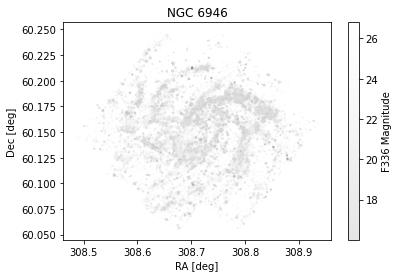

In [148]:
cm = plt.cm.get_cmap('Greys_r')
rcm = cm.reversed()
#try s= snr336/100, snr336/10, and 30-mag336
plt.scatter(bigx,bigy,c=mag336, s=snr336/100, cmap=cm, alpha=.1)#, norm=colors.CenteredNorm())
#second plot for blue emphasis
#plt.scatter(bluex,bluey,c=blue, s=bluesnr, cmap=cm, norm=colors.CenteredNorm())
plt.colorbar(label = 'F336 Magnitude')
plt.title('NGC 6946')
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')
plt.show()

In [399]:
#made one big dataframe, now need to replace matching values with average and remove the duplicate

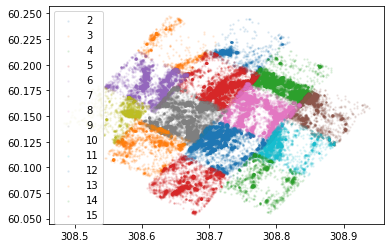

In [330]:
#make a color-coded plot based on field
#make colors better and legend nicer
plt.scatter(ra2,dec2,s=2,label = '2',alpha = .1)
plt.scatter(ra3,dec3,s=2,label='3',alpha = .1)
plt.scatter(ra4,dec4,s=2, label='4',alpha = .1)
plt.scatter(ra5,dec5,s=2,label='5',alpha = .1)
plt.scatter(ra6,dec6,s=2,label='6',alpha = .1)
plt.scatter(ra7,dec7,s=2, label='7',alpha = .1)
plt.scatter(ra8,dec8,s=2,label='8',alpha = .1)
plt.scatter(ra9,dec9,s=2,label='9',alpha = .1)
plt.scatter(ra10,dec10,s=2, label='10',alpha = .1)
plt.scatter(ra11,dec11,s=2,label='11',alpha = .1)
plt.scatter(ra12,dec12,s=2,label='12',alpha = .1)
plt.scatter(ra13,dec13,s=2, label='13',alpha = .1)
plt.scatter(ra14,dec14,s=2,label='14',alpha = .1)
plt.scatter(ra15,dec15,s=2,label='15',alpha = .1)
plt.legend()

(60.17, 60.19)

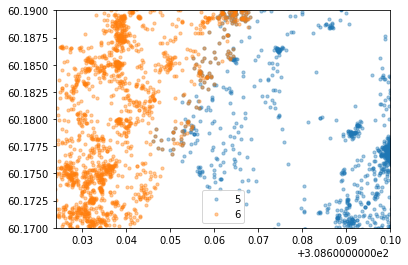

In [232]:
plt.scatter(ra5,dec5,s=10,label='5',alpha = .4)
plt.scatter(ra6,dec6,s=10,label='6',alpha = .4)
plt.legend()
plt.xlim(308.624,308.7)
plt.ylim(60.17,60.19)

In [ ]:

#match stars up based on catalog 
#start with center and match all of them that way 
#eventually match to simbad 
#see if can find stars in gaia (19th mag stars)  - 2 arcseconds 
#grayscale binning stars for both cmd and map, 10th of mag, alpha =.1
#color bar in mag not color 
#fix isochrone, look at ages of brightest stars  
#writing up what i've done so far 
#bibtex for references 
#bibtex abstract in data  


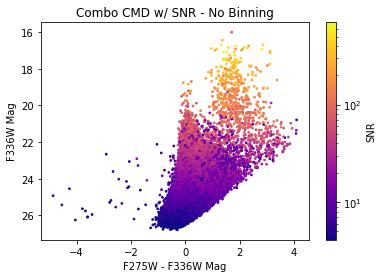

In [155]:
cm = plt.cm.get_cmap('plasma')
plt.scatter(mag275-mag336,mag336,c=snr336, s=3, cmap=cm,norm=colors.LogNorm())
plt.gca().invert_yaxis()
plt.colorbar(label = 'SNR')
plt.xlabel('F275W - F336W Mag')
plt.ylabel('F336W Mag')
plt.title('Combo CMD w/ SNR - No Binning')
plt.show()

Text(0.5, 1.0, 'Matches between Fields 2 & 5')

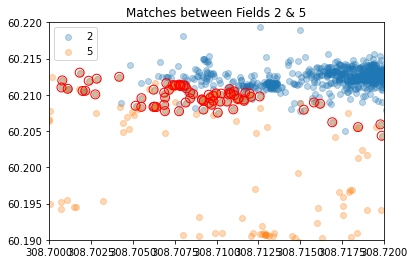

In [355]:
c2 = SkyCoord(ra=ra2*u.deg, dec=dec2*u.deg)
catalog = SkyCoord(ra=ra5*u.deg, dec=dec5*u.deg)
idx, d2d, d3d = c2.match_to_catalog_sky(catalog)
max_sep = Angle(0.05,u.arcsec)
matches = catalog[idx]
sep_constraint = d2d < max_sep
c_matches = c2[sep_constraint]
catalog_matches = catalog[idx[sep_constraint]]

#mag336
#mag275
#snr336


plt.scatter(ra2,dec2,alpha=.3,label='2')
plt.scatter(ra5,dec5,alpha=.3,label='5')
plt.scatter(c_matches.ra, c_matches.dec, s=80, facecolors='none', edgecolors='r')
plt.legend()
plt.xlim(308.7,308.72)
plt.ylim(60.19,60.22)
plt.title('Matches between Fields 2 & 5')

In [357]:
def get_matches(ra1,dec1,ra2,dec2,max_sep):
# ra1 = RA of catalog you want to match to
# dec1 = dec of catalog you want to match to
# ra2 = RA of what you want to match
# dec2 = dec of what you want to match
# max_sep = maximum separation of matches in arcseconds
# returns RA and dec of matches in both frames 
    c = SkyCoord(ra=ra2*u.deg, dec=dec2*u.deg)
    catalog = SkyCoord(ra=ra1*u.deg, dec=dec1*u.deg)
    idx, d2d, d3d = c.match_to_catalog_sky(catalog)
    max_sep = Angle(max_sep,u.arcsec)
    matches = catalog[idx]
    sep_constraint = d2d < max_sep
    c_matches = c2[sep_constraint]
    catalog_matches = catalog[idx[sep_constraint]]
    return c_matches, catalog_matches, idx[sep_constraint] 


In [362]:
c_matches,catalog_matches,idx = get_matches(ra5,dec5,ra2,dec2,0.05)
replace_ra = np.mean([[c_matches.ra],[catalog_matches.ra]],axis=0)
replace_dec = np.mean([[c_matches.dec],[catalog_matches.dec]],axis=0)

214
[[308.70078583 308.73739526 308.7018262  308.70236437 308.70980202
  308.725508   308.72733067 308.75625505 308.69628288 308.75269655
  308.74477481 308.75268935 308.75222577 308.69334649 308.74021595
  308.70074019 308.71197544 308.70623609 308.75119664 308.70981371
  308.70912713 308.74927215 308.70820415 308.75087167 308.73711964
  308.73880467 308.70516675 308.75319919 308.70736956 308.75422082
  308.74644733 308.71206889 308.70756775 308.75547156 308.74481594
  308.72575851 308.77017257 308.75129451 308.76503993 308.77058919
  308.7113292  308.7258834  308.72458714 308.75092919 308.71072072
  308.70624105 308.75109867 308.75121837 308.71257581 308.75024647
  308.76948662 308.74960555 308.70784776 308.74865543 308.70783522
  308.74650354 308.7466846  308.75141816 308.70551514 308.77036587
  308.75175103 308.76195851 308.74541041 308.77250769 308.70801775
  308.74964037 308.70716579 308.76620437 308.70748472 308.70784084
  308.75528999 308.74644767 308.71581506 308.75027259 308.

In [363]:
mat = 
df = pd.DataFrame(data=)
updated_df = pd.df.drop(index = idx, )

SyntaxError: invalid syntax (<ipython-input-363-fadc996c4b57>, line 1)